# Ejemplo personal. Transformación de señales fundamentales

In [3]:
# Importar las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt

In [169]:
# Crear las funciones básicas
def init_function(N = 7, k = 0, reflexed = False):
    # Calcular el origen basado en el desplazamiento
    origin = k
    
    # Vector de muestras
    n = np.array(range(origin - N//2,
                       origin + N//2 + (1 if N%2==1 else 0)))
    
    # Aplicar la reflexión en caso de ser solicitado
    n = -n if reflexed else n
    
    # Vector de valores
    X = np.zeros(N)
    
    return n, X
    
def delta(N = 7, k = 0, A = 1, reflexed = False):
    n, X = init_function(N = N, k = k, reflexed = reflexed)
    
    # Asignar los valores característicos del delta
    X[np.where(n == (-1 if reflexed else 1)*k)] = A
    
    return n, X

def step(N = 7, k = 0, A = 1, reflexed = False):
    n, X = init_function(N = N, k = k, reflexed = reflexed)
    
    # Asignar los valores característicos del escalón
    if reflexed:
        X[np.where(n <= (-1)*k)] = A
    else:
        X[np.where(n >= k)] = A
    
    return n, X

def ramp(N = 7, k = 0, A = 1, reflexed = False):
    n, X = init_function(N = N, k = k, reflexed = reflexed)
    
    # Asignar los valores característicos del escalón
    if reflexed:
        X[np.where(n < (-1)*k)] = A
        X = np.array([-x*(n_i + k) for x, n_i in zip(X, n)])
    else:
        X[np.where(n > k)] = A
        X = np.array([x*(n_i - k) for x, n_i in zip(X, n)])
    # Multiplicar cada valor por el n - k para hacer la rampa
    
    return n, X

## 1. Función delta

In [170]:
# Escalamiento en amplitud
A = 4
# Número de muestras
N = 17
# Desplazamiento temporal
k = -3
# ¿Reflejar la señal?
reflex = True

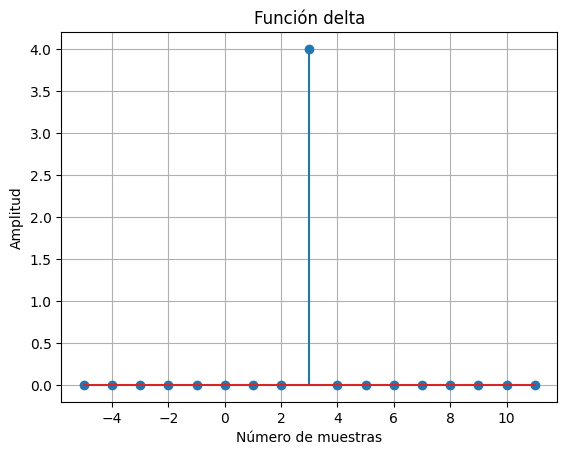

In [171]:
# Generar la señal
n1, X1 = delta(N=N, k=k, A=A, reflexed=reflex)

# Grafica de la secuencia
plt.figure()
plt.title('Función delta')
plt.stem(n1, X1)
plt.xlabel('Número de muestras')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

## 2. Función escalón

In [180]:
# Escalamiento en amplitud
A = 4
# Número de muestras
N = 16
# Desplazamiento temporal
k = -1
# ¿Reflejar la señal?
reflex = True

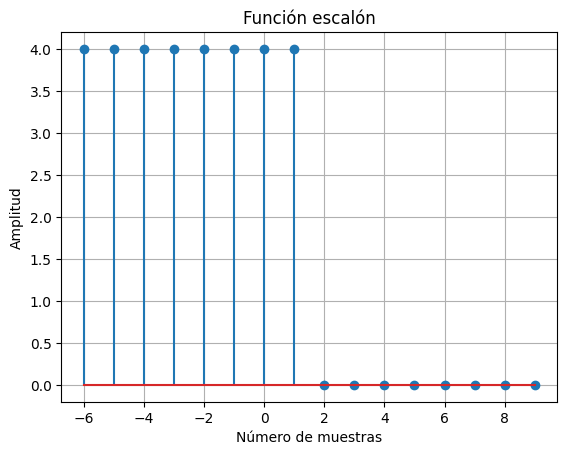

In [181]:
# Generar la señal
n2, X2 = step(N=N, k=k, A=A, reflexed=reflex)

# Grafica de la secuencia
plt.figure()
plt.title('Función escalón')
plt.stem(n2, X2)
plt.xlabel('Número de muestras')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

## 3. Función rampa

In [186]:
# Escalamiento en amplitud
A = 1
# Número de muestras
N = 16
# Desplazamiento temporal
k = -1
# ¿Reflejar la señal?
reflex = True

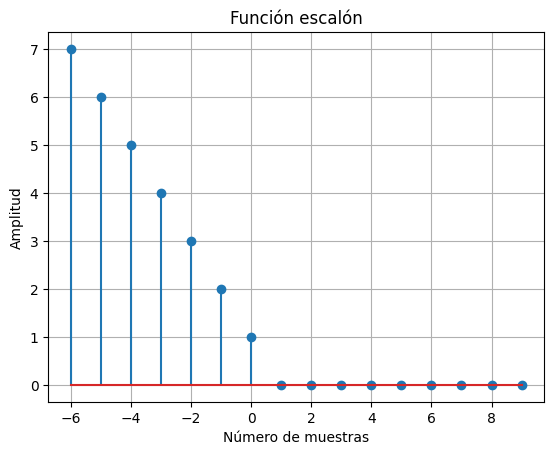

In [187]:
# Generar la señal
n3, X3 = ramp(N = N, k = k, A = A, reflexed = reflex)

# Grafica de la secuencia
plt.figure()
plt.title('Función escalón')
plt.stem(n3, X3)
plt.xlabel('Número de muestras')
plt.ylabel('Amplitud')
plt.grid()
plt.show()